In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

In [4]:
df1 = pd.read_csv('IscoEvents1.csv')

In [5]:
df1

,Player,Event,Mins,Secs,X,Y
0,Isco,Tackle,0,11,56,57
1,Isco,Tackle,0,16,54,12
2,Isco,Tackle,0,32,83,85
3,Isco,Take On,1,37,57,70
4,Isco,Tackle,1,39,36,65
5,Isco,Interception,2,5,32,57
6,Isco,Take On,2,13,44,65
7,Isco,Take On,2,18,34,44
8,Isco,Shot,2,26,13,37
9,Isco,Take On,2,41,48,47


In [6]:
df1['X'] = df1['X']*1.2
df1['Y'] = df1['Y']*0.8

In [7]:
df1

,Player,Event,Mins,Secs,X,Y
0,Isco,Tackle,0,11,67.2,45.6
1,Isco,Tackle,0,16,64.8,9.6
2,Isco,Tackle,0,32,99.6,68.0
3,Isco,Take On,1,37,68.4,56.0
4,Isco,Tackle,1,39,43.2,52.0
5,Isco,Interception,2,5,38.4,45.6
6,Isco,Take On,2,13,52.8,52.0
7,Isco,Take On,2,18,40.8,35.2
8,Isco,Shot,2,26,15.6,29.6
9,Isco,Take On,2,41,57.6,37.6


Text(0.5, 1.0, 'Isco Action Map vs Levante 21/22')

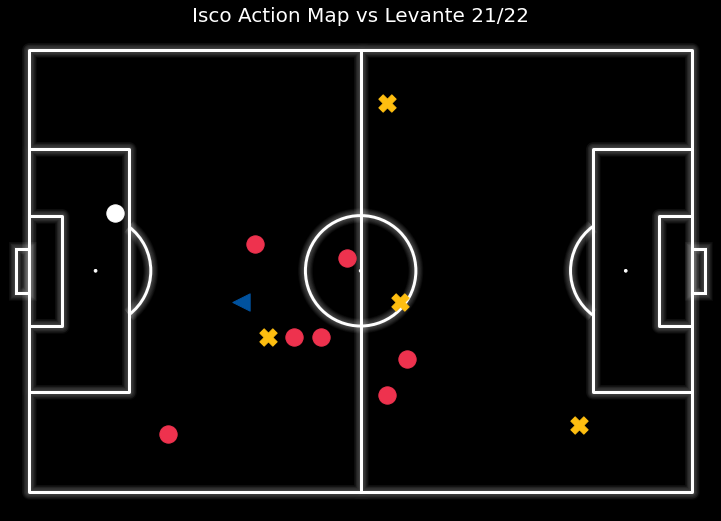

In [9]:
#Action Map
DIFF_LINEWIDTH = 1.2 # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15
BACKGROUND_COLOR = '#000000'
Tackle = '#FEBE10' #yellow
TakeOn = '#EE324E' #red
Shot = '#FFF'
Interception = '#00529F'#blue
LINE_COLOR ='#FFF'
pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=3,
              line_alpha=1, goal_alpha=1, goal_type='box')
fig, ax = pitch.grid(grid_height=0.75, title_height=0, axis=False,
                     endnote_height=0, title_space=0, endnote_space=0)
fig.set_facecolor(BACKGROUND_COLOR)
for i in range(1, NUM_GLOW_LINES + 1):
    pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,
                  linewidth=3 + (DIFF_LINEWIDTH * i),
                  line_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_type='box')
    pitch.draw(ax=ax['pitch'])  # we plot on-top of our previous axis from pitch.grid
    
for i in range(len(df1['Player'])):
    if df1['Event'][i] == 'Tackle':
        pitch.scatter(df1['X'][i], df1['Y'][i],
        # size varies between 100 and 1000 (points squared)
        s=300,
        c=Tackle,  # color for scatter in hex format
        marker='X',
        alpha=1,
        ax=ax['pitch'])
    if df1['Event'][i] == 'Shot':
        pitch.scatter(df1['X'][i], df1['Y'][i],
        # size varies between 100 and 1000 (points squared)
        s=300,
        c=Shot,  # color for scatter in hex format
        marker='o',
        alpha=1,
        ax=ax['pitch'])
    if df1['Event'][i] == 'Take On':
        pitch.scatter(df1['X'][i], df1['Y'][i],
        # size varies between 100 and 1000 (points squared)
        s=300,
        c=TakeOn,  # color for scatter in hex format
        marker='o',
        alpha=1,
        ax=ax['pitch'])
    if df1['Event'][i] == 'Interception':
        pitch.scatter(df1['X'][i], df1['Y'][i],
        # size varies between 100 and 1000 (points squared)
        s=300,
        c=Interception,  # color for scatter in hex format
        marker='<',
        alpha=1,
        ax=ax['pitch'])
        
plt.title("Isco Action Map vs Levante 21/22", color='white',size=20)